# CLEAN HOUSING DATA

Reference: https://github.com/Esri/arcgis-python-api/blob/conference_talks/talks/GeoDevPDX2018/01_clean-housing-data.ipynb

## Table of Content
<div class="alert alert-block alert-info" style="margin-top: 20px">

1. <a href="#item1">Read data from all CSV files</a>

2. <a href="#item2">Merge all CSV into a single dataframe</a>

3. <a href="#item3">Find duplicates</a>  
   
4. <a href="#item4">Find and fill missing values</a>
    
5. <a href="#item5">Filter outliers</a>
    
6. <a href="#item6">Export cleaned data</a>
    
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a id="item1"></a>

## Read data from all CSV files

In [2]:
csv1_path = 'capstone_data/redfin_2020-07-01-06-51-57_gb.csv'
csv2_path = 'capstone_data/redfin_2020-07-01-06-52-37_rv.csv'
csv3_path = 'capstone_data/redfin_2020-07-01-06-54-52_ah.csv'
csv4_path = 'capstone_data/redfin_2020-07-01-06-56-37_dw.csv'
csv5_path = 'capstone_data/redfin_2020-07-01-06-57-13_rp.csv'
csv6_path = 'capstone_data/redfin_2020-07-01-06-57-42_tb.csv'

In [3]:
prop_df1 = pd.read_csv(csv1_path)
prop_df2 = pd.read_csv(csv2_path)
prop_df3 = pd.read_csv(csv3_path)
prop_df4 = pd.read_csv(csv4_path)
prop_df5 = pd.read_csv(csv5_path)
prop_df6 = pd.read_csv(csv6_path)
prop_df1.head(3)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,9100 Chesley Knoll Ct,Gaithersburg,MD,20879,420000,5.0,3.0,...,Active,NaN,NaN,http://www.redfin.com/MD/Gaithersburg/9100-Che...,BRIGHT MLS,MDMC708814,N,Y,39.180400,-77.185015
1,PAST SALE,April-13-2020,Single Family Residential,7810 Warfield Rd,Gaithersburg,MD,20886,845000,6.0,6.5,...,Sold,NaN,NaN,http://www.redfin.com/MD/Gaithersburg/7810-War...,BRIGHT MLS,MDMC693060,N,Y,39.193675,-77.159616
2,PAST SALE,NaN,Single Family Residential,12136 Pawnee Dr,Gaithersburg,MD,20878,570000,NaN,2.5,...,NaN,NaN,NaN,http://www.redfin.com/MD/Gaithersburg/12136-Pa...,NaN,NaN,N,Y,39.124472,-77.252308


In [4]:
(prop_df1.shape,prop_df2.shape,prop_df3.shape,prop_df4.shape,prop_df5.shape,prop_df6.shape)

((350, 27), (350, 27), (213, 27), (79, 27), (43, 27), (55, 27))

<a id="item2"></a>

## Merge all CSV into a single dataframe

In [5]:
prop_df = prop_df1.append(prop_df2)
prop_df = prop_df.append(prop_df3)
prop_df = prop_df.append(prop_df4)
prop_df = prop_df.append(prop_df5)
prop_df = prop_df.append(prop_df6)
prop_df.shape

(1090, 27)

In [6]:
prop_df['LOCATION']

0        HUNTERS WOODS
1       GOSHEN ESTATES
2                  NaN
3                  NaN
4        MISSION HILLS
            ...       
50           TWINBROOK
51           ROCKCREST
52    TWINBROOK FOREST
53           ROCKCREST
54           TWINBROOK
Name: LOCATION, Length: 1090, dtype: object

<a id="item3"></a>

## Find if there are duplicates

In [7]:
prop_dup_index = prop_df.duplicated(['ADDRESS'])
prop_dup = prop_df[prop_dup_index]
prop_dup.shape

(172, 27)

In [8]:
prop_df.drop_duplicates(subset=['ADDRESS'],inplace=True)
prop_df.shape

(918, 27)

## Clean column names

In [9]:
prop_df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [10]:
prop_df.rename(index=str,columns={'$/SQUARE FEET':'PRICE PER SQFT',
                                 'HOA/MONTH':'HOA PER MONTH',
                                 'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)':'URL',
                                 'MLS#':'MLS'},inplace=True)
prop_df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       'PRICE PER SQFT', 'HOA PER MONTH', 'STATUS',
       'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL',
       'SOURCE', 'MLS', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

## Drop unnecessary columns

In [11]:
prop_df.drop(columns=['SOLD DATE',
                      'NEXT OPEN HOUSE END TIME',
                      'NEXT OPEN HOUSE START TIME',
                      'FAVORITE','INTERESTED',
                      'LOCATION','SOURCE','STATUS',
                      'DAYS ON MARKET','MLS'],inplace=True)

In [12]:
prop_df.head()

,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,PRICE PER SQFT,HOA PER MONTH,URL,LATITUDE,LONGITUDE
0,MLS Listing,Single Family Residential,9100 Chesley Knoll Ct,Gaithersburg,MD,20879,420000,5.0,3.0,2250.0,11798.0,1982.0,187.0,NaN,http://www.redfin.com/MD/Gaithersburg/9100-Che...,39.180400,-77.185015
1,PAST SALE,Single Family Residential,7810 Warfield Rd,Gaithersburg,MD,20886,845000,6.0,6.5,7529.0,79930.0,1987.0,112.0,NaN,http://www.redfin.com/MD/Gaithersburg/7810-War...,39.193675,-77.159616
2,PAST SALE,Single Family Residential,12136 Pawnee Dr,Gaithersburg,MD,20878,570000,NaN,2.5,2814.0,14656.0,1973.0,203.0,NaN,http://www.redfin.com/MD/Gaithersburg/12136-Pa...,39.124472,-77.252308
3,PAST SALE,Single Family Residential,14640 Brougham Way,North Potomac,MD,20878,636000,NaN,2.5,4008.0,17061.0,1986.0,159.0,NaN,http://www.redfin.com/MD/North-Potomac/14640-B...,39.095535,-77.250192
4,PAST SALE,Single Family Residential,114 Mission Dr,Gaithersburg,MD,20878,668000,4.0,3.5,2960.0,6388.0,1991.0,226.0,8.0,http://www.redfin.com/MD/Gaithersburg/114-Miss...,39.107758,-77.216220


<a id="item4"></a>

## Find and fill missing values

Let's explore the histograms of numerical columns.

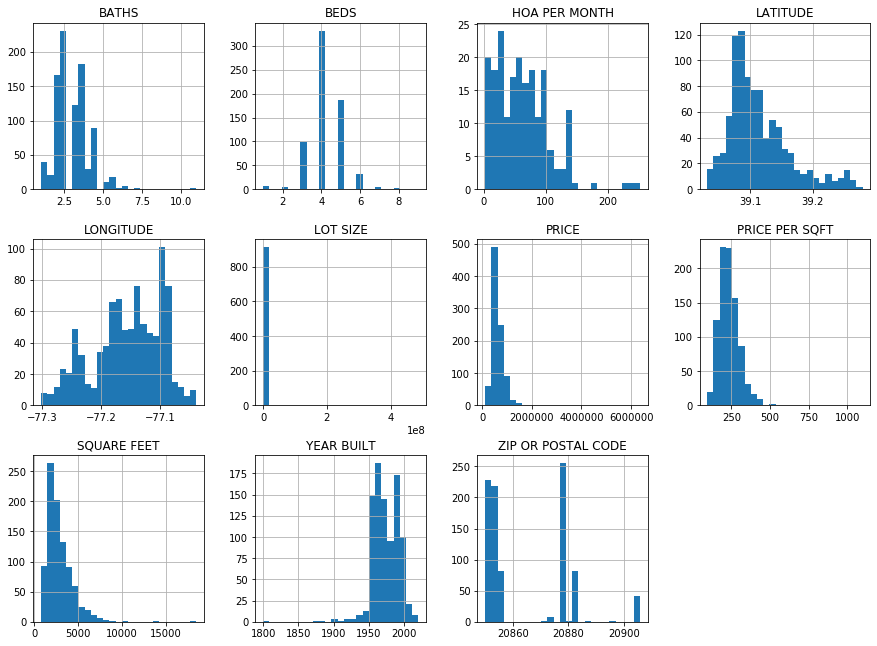

In [13]:
ax_list = prop_df.hist(bins=25,layout=(4,4),figsize=(15,15))

In [14]:
total = prop_df.isnull().sum().sort_values(ascending=False)
percent = ((prop_df.isnull().sum()/prop_df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Missing (%)'])
missing_data.head(30)

,Total,Missing (%)
HOA PER MONTH,716,77.995643
BEDS,249,27.124183
PRICE PER SQFT,8,0.871460
SQUARE FEET,8,0.871460
YEAR BUILT,6,0.653595
LOT SIZE,3,0.326797
LONGITUDE,0,0.000000
STATE OR PROVINCE,0,0.000000
PROPERTY TYPE,0,0.000000
ADDRESS,0,0.000000


We will impute for missing values using different strategies for other columns.

In [15]:
prop_df['HOA PER MONTH'].fillna(value=0,inplace=True)
prop_df['BEDS'].fillna(value=prop_df['BEDS'].median(),inplace=True)
prop_df['PRICE PER SQFT'].fillna(value=prop_df['PRICE PER SQFT'].median(),inplace=True)
prop_df['SQUARE FEET'].fillna(value=prop_df['SQUARE FEET'].median(),inplace=True)
prop_df['YEAR BUILT'].fillna(value=prop_df['YEAR BUILT'].mode(),inplace=True)
prop_df['LOT SIZE'].fillna(value=prop_df['LOT SIZE'].median(),inplace=True)

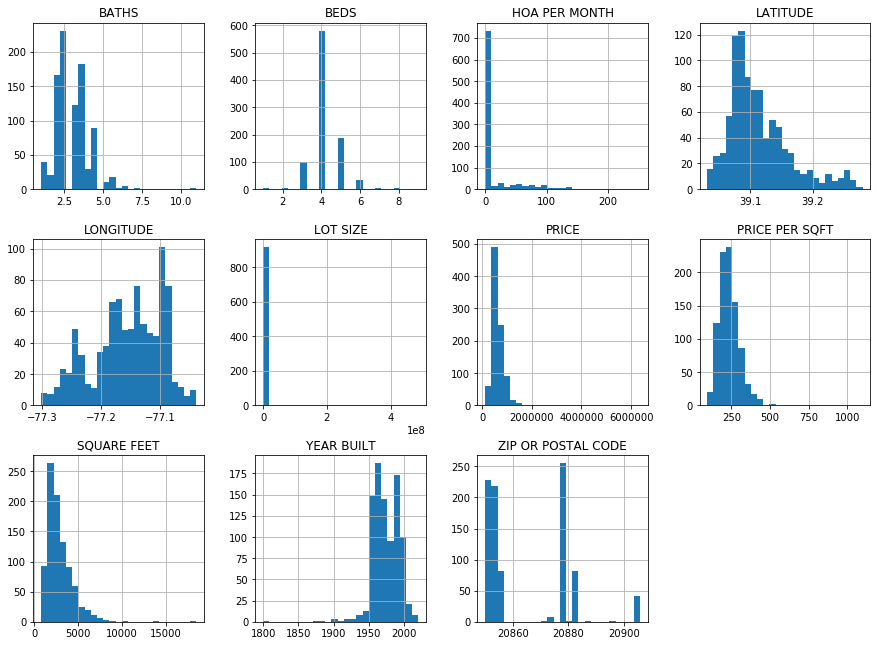

In [16]:
ax_list = prop_df.hist(bins=25,layout=(4,4),figsize=(15,15))
plt.savefig(r'capstone_images/prop_hist.png',dpi=300)

## Explore distribution of numeric columns

In [17]:
prop_df.describe().round(3)

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,PRICE PER SQFT,HOA PER MONTH,LATITUDE,LONGITUDE
count,918.000,918.000,918.000,918.000,918.000,9.180000e+02,912.000,918.000,918.000,918.000,918.000
mean,20864.948,623048.144,4.169,2.959,2871.089,5.644892e+05,1973.300,235.913,13.776,39.113,-77.155
std,15.624,316768.755,0.794,1.046,1508.081,1.608710e+07,18.798,69.913,33.219,0.049,0.058
min,20850.000,125000.000,1.000,1.000,768.000,1.115000e+03,1800.000,93.000,0.000,39.031,-77.301
25%,20853.000,450000.000,4.000,2.500,1890.750,8.516750e+03,1962.000,189.000,0.000,39.080,-77.188
50%,20855.000,560000.000,4.000,3.000,2454.500,1.119700e+04,1971.000,228.000,0.000,39.101,-77.149
75%,20878.000,743750.000,4.000,3.500,3552.500,2.062450e+04,1987.000,272.000,0.000,39.137,-77.103
max,20906.000,6375000.000,9.000,11.000,18422.000,4.874364e+08,2020.000,1100.000,253.000,39.280,-77.038


## Build statistical filters to remove outliers

We build 6 sigma and Inter Quartile Range (IQR) filters to remove outliers from our dataset.

In [18]:
def six_sigma_filter(df, column):
    sigma = df[column].std()
    mu = df[column].mean()
    three_sigma = [mu-(3*sigma), mu+(3*sigma)]
    print("Column:{}, Mean:{}, Sigma:{}, 3sigma_range: {}:{}".format(column,mu.round(3),
                                                                       sigma.round(3),
                                                                       three_sigma[0].round(2),
                                                                       three_sigma[1].round(2)))
    
    # filter
    df_to_keep = df[(df[column] > three_sigma[0]) & (df[column] < three_sigma[1])]
    
    # prints
    num_rows_dropped = prop_df.shape[0] - df_to_keep.shape[0]
    print("Number of rows dropped: " + str(num_rows_dropped))
    
    return df_to_keep

In [19]:
def iqr_filter(df, column):
    med = df[column].median()
    p_25 = df[column].quantile(q=0.25)
    p_75 = df[column].quantile(q=0.75)
    
    # find valid range
    iqr_range = [med-(2*p_25), med+(2*p_75)]
    print("Column: {}, Median:{}, 25%:{}, 75%:{}, IQR:{}:{}".format(column,med,
                                                                    p_25,p_75,
                                                                    iqr_range[0].round(2),
                                                                    iqr_range[1].round(2)))
    
    # filter
    df_to_keep = df[(df[column] > iqr_range[0]) & (df[column] < iqr_range[1])]
    
    #prints
    num_rows_dropped = prop_df.shape[0] - df_to_keep.shape[0]
    print("Number of rows dropped: " + str(num_rows_dropped))
    
    return df_to_keep

<a id="item5"></a>

## Filter columns using both filters and compare

In [20]:
prop_df2 = six_sigma_filter(prop_df,'BATHS')
prop_df2_iqr = iqr_filter(prop_df,'BATHS')

Column:BATHS, Mean:2.959, Sigma:1.046, 3sigma_range: -0.18:6.1
Number of rows dropped: 6
Column: BATHS, Median:3.0, 25%:2.5, 75%:3.5, IQR:-2.0:10.0
Number of rows dropped: 1


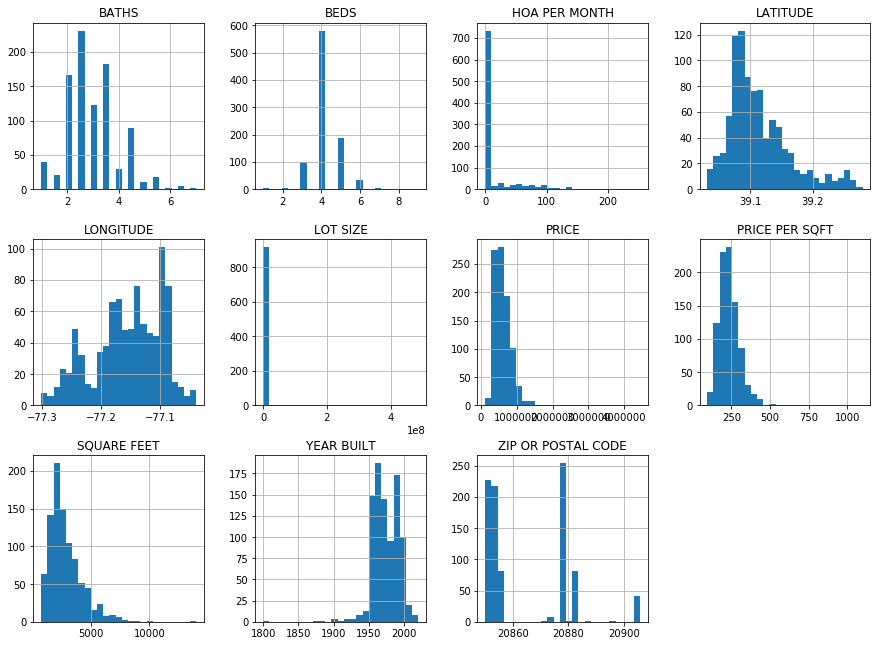

In [21]:
ax_list = prop_df2_iqr.hist(bins=25,layout=(4,4),figsize=(15,15))
plt.savefig(r'capstone_images/outlier_filter_bath_iqr.png',dpi=300)

In [22]:
prop_df3 = six_sigma_filter(prop_df,'HOA PER MONTH')
prop_df3_iqr = iqr_filter(prop_df,'HOA PER MONTH')

Column:HOA PER MONTH, Mean:13.776, Sigma:33.219, 3sigma_range: -85.88:113.43
Number of rows dropped: 23
Column: HOA PER MONTH, Median:0.0, 25%:0.0, 75%:0.0, IQR:0.0:0.0
Number of rows dropped: 918


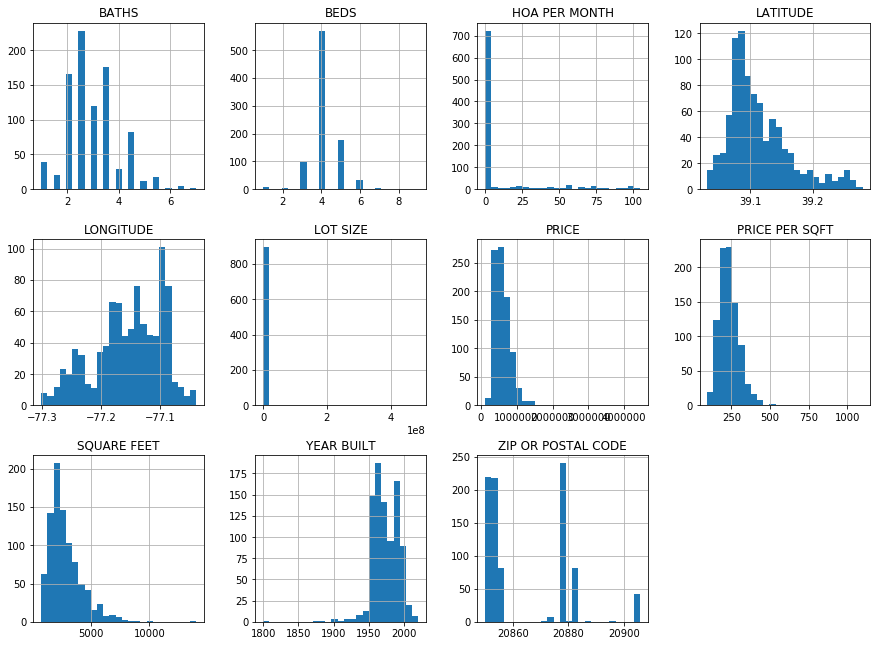

In [23]:
ax_list = prop_df3.hist(bins=25,layout=(4,4),figsize=(15,15))

In [24]:
prop_df4 = six_sigma_filter(prop_df,'LOT SIZE')
prop_df4_iqr = iqr_filter(prop_df,'LOT SIZE')

Column:LOT SIZE, Mean:564489.243, Sigma:16087103.46, 3sigma_range: -47696821.14:48825799.62
Number of rows dropped: 1
Column: LOT SIZE, Median:11197.0, 25%:8516.75, 75%:20624.5, IQR:-5836.5:52446.0
Number of rows dropped: 114


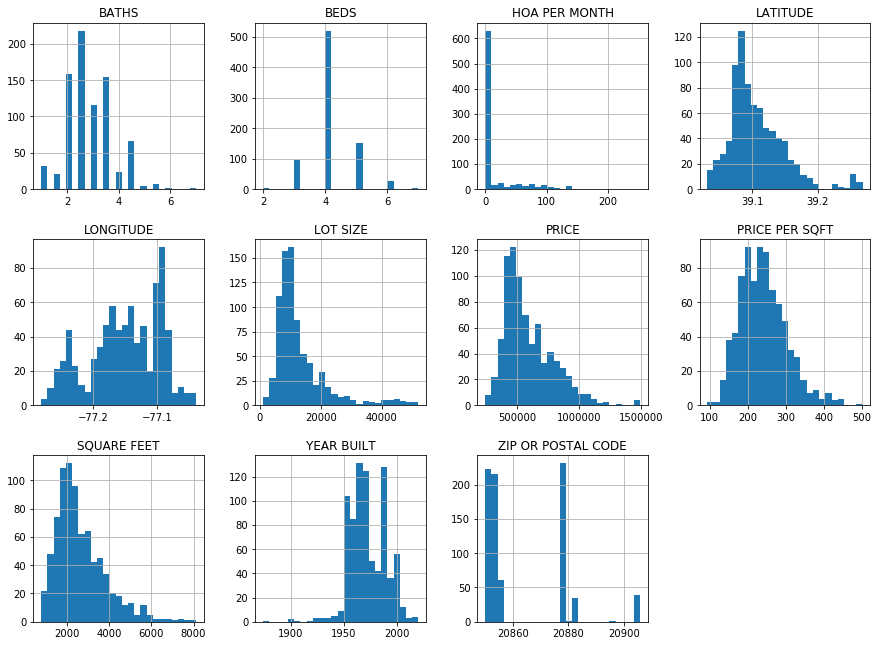

In [25]:
ax_list = prop_df4_iqr.hist(bins=25,layout=(4,4),figsize=(15,15))
plt.savefig(r'capstone_images/filter-outliers.png',dpi=300)

In [26]:
prop_df5 = six_sigma_filter(prop_df,'PRICE')
prop_df5_iqr = iqr_filter(prop_df,'PRICE')

Column:PRICE, Mean:623048.144, Sigma:316768.755, 3sigma_range: -327258.12:1573354.41
Number of rows dropped: 4
Column: PRICE, Median:560000.0, 25%:450000.0, 75%:743750.0, IQR:-340000.0:2047500.0
Number of rows dropped: 2


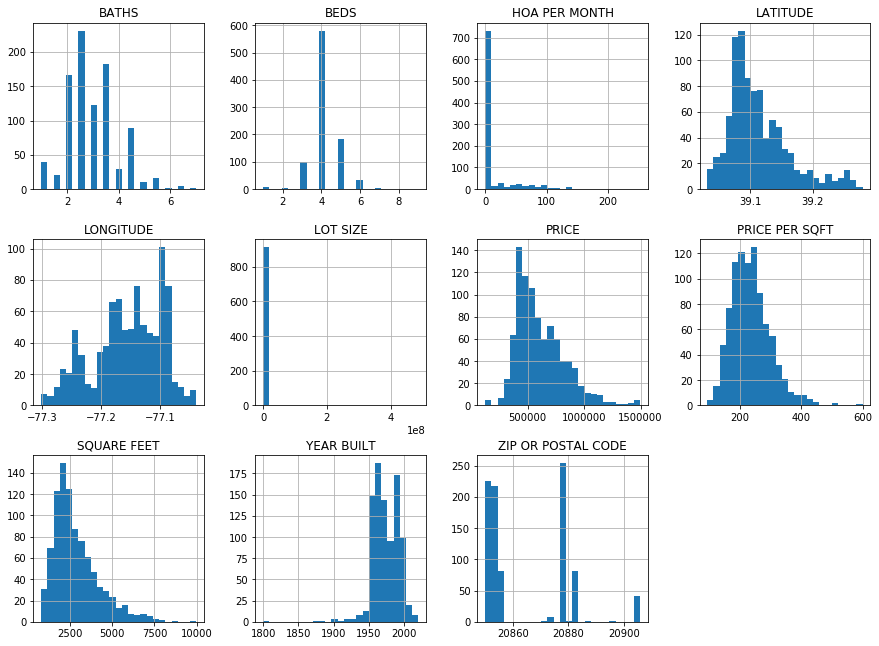

In [27]:
ax_list = prop_df5.hist(bins=25,layout=(4,4),figsize=(15,15))

In [28]:
prop_df6 = six_sigma_filter(prop_df,'YEAR BUILT')
prop_df6_iqr = iqr_filter(prop_df,'YEAR BUILT')

Column:YEAR BUILT, Mean:1973.3, Sigma:18.798, 3sigma_range: 1916.91:2029.7
Number of rows dropped: 14
Column: YEAR BUILT, Median:1971.0, 25%:1962.0, 75%:1987.0, IQR:-1953.0:5945.0
Number of rows dropped: 6


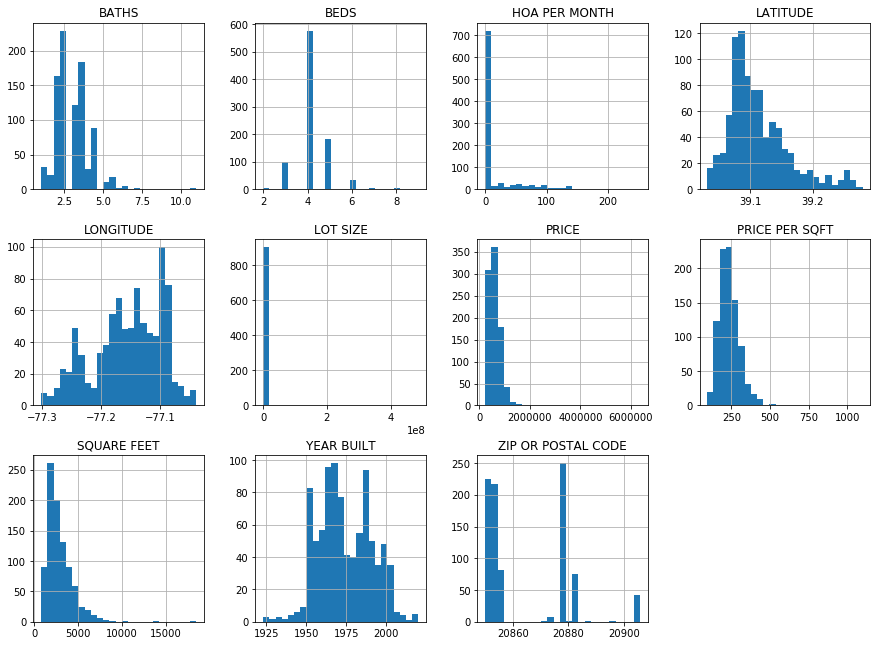

In [29]:
ax_list = prop_df6.hist(bins=25,layout=(4,4),figsize=(15,15))

In [30]:
prop_df7 = six_sigma_filter(prop_df,'SQUARE FEET')
prop_df7_iqr = iqr_filter(prop_df,'SQUARE FEET')

Column:SQUARE FEET, Mean:2871.089, Sigma:1508.081, 3sigma_range: -1653.15:7395.33
Number of rows dropped: 10
Column: SQUARE FEET, Median:2454.5, 25%:1890.75, 75%:3552.5, IQR:-1327.0:9559.5
Number of rows dropped: 3


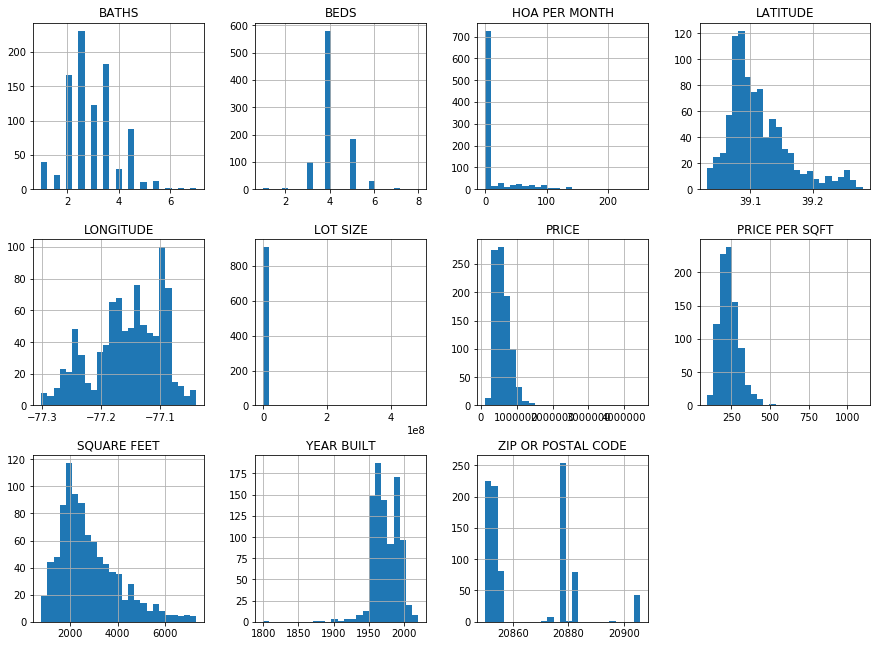

In [31]:
ax_list = prop_df7.hist(bins=25,layout=(4,4),figsize=(15,15))

<a id="item6"></a>

## Export cleaned data

The IQR filter on `LOT SIZE` yields a better result in this case as the resulting histograms of numeric columns show a nice normal distribution. We proceed to export the cleaned data.

In [32]:
prop_df4_iqr.shape

(804, 17)

In [33]:
prop_df4_iqr.to_csv('capstone_data/houses_filtered.csv',index=False)